In [1]:
import numpy as np
import matplotlib.pyplot as plt

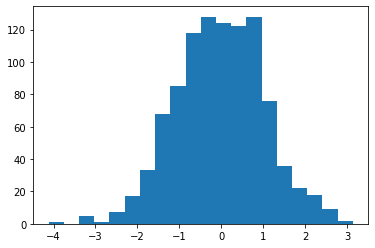

In [2]:
mu, sigma = 0,1
digits = np.random.normal(mu,sigma,1000)
plt.hist(digits,20)
plt.show()

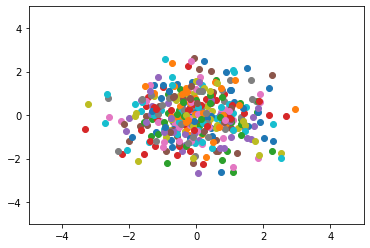

In [3]:
for i in range(400):
    x = np.random.normal(mu,sigma,1)
    y = np.random.normal(mu,sigma,1)
    plt.plot(x,y,'o')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

In [4]:
def plot_points_from_gaussian(M,Sigma,N=100):
    for i in range(N):
        xs = np.random.multivariate_normal(M,Sigma,1)
        plt.plot(xs[0][0],xs[0][1],'o')
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.show()

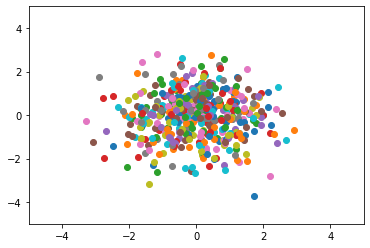

In [5]:
plot_points_from_gaussian(np.zeros(2),np.eye(2),500)

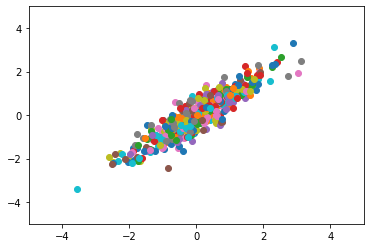

In [11]:
M = np.zeros(2)
Sigma = np.array([[1,0.9],
                  [0.9,1]])
plot_points_from_gaussian(M,Sigma,500)

In [17]:
def plot_unit_gaussian_samples(D,M,Sigma):
    xs = np.linspace(0,1,D)
    for i in range(10):
        ys = np.random.multivariate_normal(M,Sigma)
        plt.plot(xs,ys)
    plt.show()

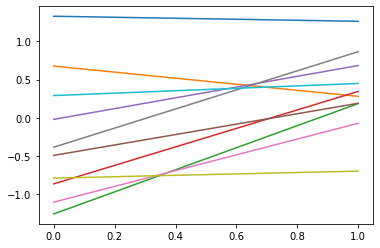

In [18]:
M = np.zeros(2)
Sigma = np.eye(2)
plot_unit_gaussian_samples(2, M,Sigma)

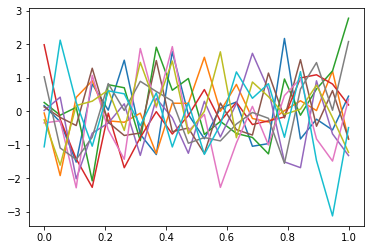

In [9]:
M = np.zeros(20)
Sigma = np.eye(20)
plot_unit_gaussian_samples(20, M,Sigma)

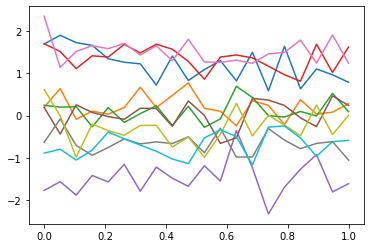

In [21]:
M = np.zeros(20)
Sigma = np.eye(20)
Sigma[Sigma==0] = 0.9
plot_unit_gaussian_samples(20, M,Sigma)

In [22]:
def k(xs,ys,sigma=1,l=1):
    dx = np.expand_dims(xs,1) - np.expand_dims(ys,0)
    return (sigma**2)*np.exp(-((dx/l)**2))

def m(x):
    return np.zeros_like(x)

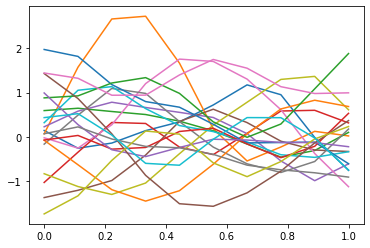

In [30]:
D = 10
xs = np.linspace(0,1,D)
for i in range(20):
    ys = np.random.multivariate_normal(m(xs),k(xs,xs,0.9,0.3))
    plt.plot(xs,ys)

In [31]:
def plot_gaussian_samples(xs,mu,K):
    for i in range(10):
        ys = np.random.multivariate_normal(mu,K)
        plt.plot(xs,ys)
    plt.show()

In [32]:
n=100
xs = np.linspace(-5,5,n)
K = k(xs,xs,sigma=1,l=1)
mu = m(xs)

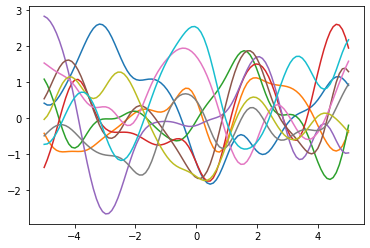

In [33]:
plot_gaussian_samples(xs,mu,K)

In [40]:
coefs = [6.0,-2.5,-2.4,-0.1,0.2,0.03]
def f(x):
    total = 0
    for exp,coef in enumerate(coefs):
        total+= coef*(x**exp)
    return total

In [41]:
xs = np.linspace(-8.0,7,100)
ys = f(xs)

(-50.0, 50.0)

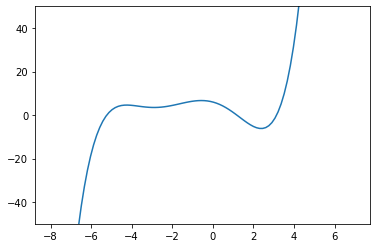

In [43]:
plt.plot(xs,ys)
plt.ylim((-50,50))

In [60]:
x_obs = np.array([-4,-1.5,0,1.5,2.5,2.7,6.0,-5.5])
y_obs = f(x_obs)
x_s = np.linspace(-8,7,80)

In [61]:
K = k(x_obs,x_obs)
K_s = k(x_obs,x_s)
K_ss = k(x_s,x_s)
K_sTKinv = np.matmul(K_s.T,np.linalg.pinv(K))

mu_s = m(x_s) + np.matmul(K_sTKinv, y_obs-m(x_obs))
Sigma_s = K_ss- np.matmul(K_sTKinv,K_s)

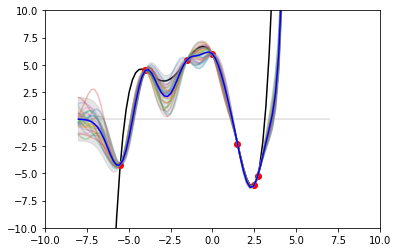

In [68]:
y_true = f(x_s)

true_line = plt.plot(x_s,y_true,color='black')
train_data = plt.plot(x_obs,y_obs,'o',color='red')

stds = np.sqrt(Sigma_s.diagonal())
err_xs = np.concatenate((x_s,np.flip(x_s,0)))
err_ys = np.concatenate((mu_s+2*stds,np.flip(mu_s-2*stds,0)))

uncertainty = plt.fill_between(err_xs,err_ys,color='grey',alpha=0.2)

for i in range(30):
    y_s = np.random.multivariate_normal(mu_s,Sigma_s)
    plt.plot(x_s,y_s,alpha=0.3)

mean_line = plt.plot(x_s,mu_s,color='blue')
plt.ylim((-10,10))
plt.xlim((-10,10))
plt.show()